# Sharing visualizations with others
> This chapter shows you how to share your visualizations with others - how to save your figures as files, how to adjust their look and feel, and how to automate their creation based on input data. This is the Summary of lecture "Introduction to Data Visualization with Matplotlib", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: images/sports_weights.png

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

## Preparing your figures to share with others
- Guidelines for choosing plotting style
    - Dark backgrounds are usually less visible
    - If color is important, consider choosing colorblind-friendly options `"seaborn-colorblind"` or `"tableau-colorblind10"`
    - If you think that someone will want to print your gure, use less ink
    - If it will be printed in black-and-white, use the "grayscale" sty

In [2]:
seattle_weather = pd.read_csv('./dataset/seattle_weather.csv', index_col='DATE')
austin_weather = pd.read_csv('./dataset/austin_weather.csv', index_col='DATE')

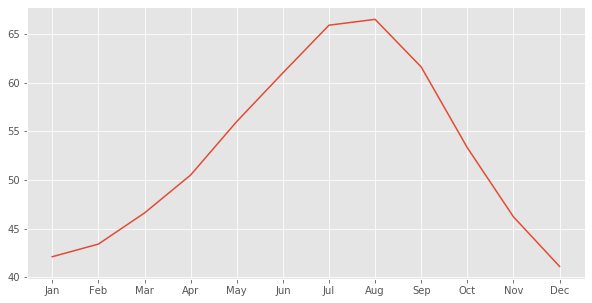

In [3]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"]);

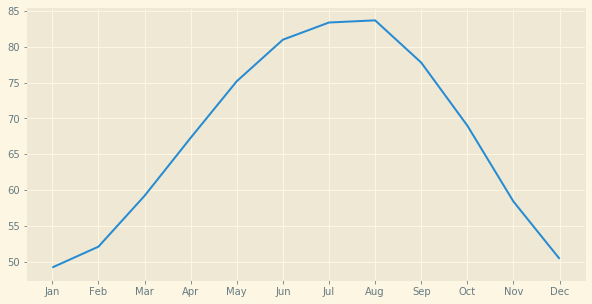

In [4]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"]);

## Automating figures from data
- Why automate?
    - Ease and speed
    - Flexibility
    - Robustness
    - Reproducibility

### Unique values of a column
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In this exercise and the next, you will be visualizing the weight of medalis in the 2016 summer Olympic Games again, from a dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas DataFrame object called `summer_2016_medals`, which has a column called `"Sport"` that tells you to which branch of sport each row corresponds. There is also a `"Weight"` column that tells you the weight of each athlete.

In [5]:
summer_2016_medals = pd.read_csv('./dataset/summer_2016_medals.csv', index_col=0)

In [6]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


### Automate your visualization
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

This is what you will do in this exercise. You will be visualizing data about medal winners in the 2016 summer Olympic Games again, but this time you will have a dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas DataFrame object called `summer_2016_medals`, which has a column called `"Sport"` that tells you to which branch of sport each row corresponds. There is also a `"Weight"` column that tells you the weight of each athlete.

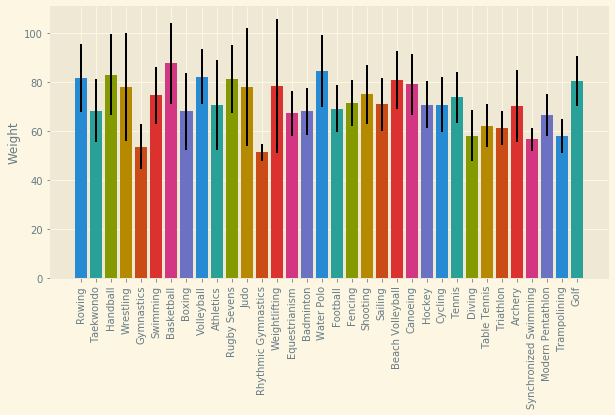

In [7]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std());

ax.set_ylabel("Weight");
ax.set_xticklabels(sports, rotation=90);

# Save the figure to file
fig.savefig("../images/sports_weights.png")